In [1]:
# Problem:
# We're given data about scores of students in two exams and based on the scores, whether they got admission or not
# based on the data, we are supposed to build a logistic regression model for predicting whether a student will get in or not.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
import seaborn as sb

In [3]:
data = np.loadtxt("ex2data1.txt", delimiter = ',', usecols=(0,1,2), unpack=True)
X=np.transpose(data[:-1])
Y=np.transpose(data[-1:])
X.shape

(100, 2)

Text(0,0.5,'exam 2 score')

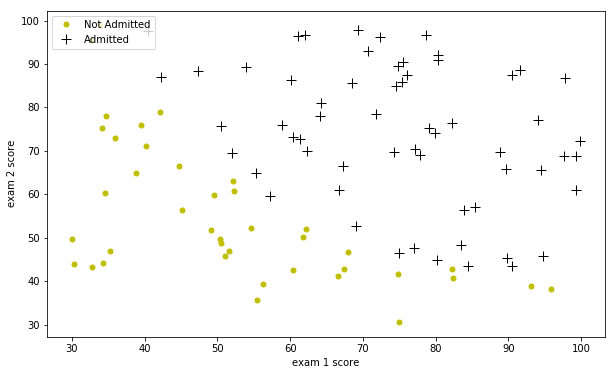

In [4]:
plt.figure(figsize=(10,6))
y = Y.reshape(100)
plt.plot(X[y == 0, 0], X[y == 0, 1], markersize='5', marker='o',linewidth=0, c='y',label='Not Admitted')
plt.plot(X[y == 1, 0], X[y==1,1], markersize='10',marker='+',linewidth=0, c='black',label='Admitted')
plt.legend(loc='upper left')
plt.xlabel("exam 1 score")
plt.ylabel("exam 2 score")

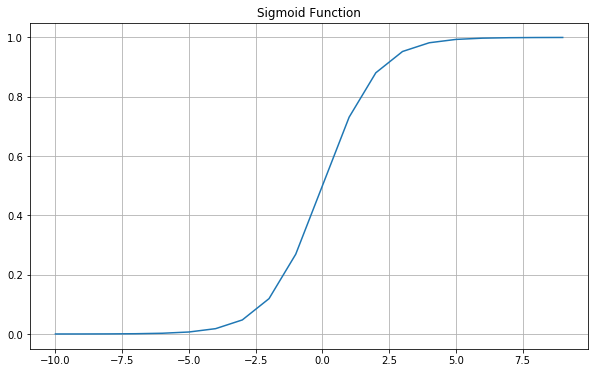

In [5]:
#Sigmoid or Logistic Function:
import math
def hValue(theta,X):
    #print(X.shape)
    t=theta.reshape((theta.shape[0],1))
    return X.dot(t)

def sigmoidFn(hVal):
    return (1/(1 + pow(math.e,-(hVal))))

x=np.insert(X,0,1,axis=1)
theta=np.array([0,0,0])

plt.figure(figsize=(10,6))
a = np.arange(-10,10)
s = sigmoidFn(a)
plt.plot(a,s)
plt.title("Sigmoid Function")
plt.grid(True)

In [6]:
def costFunction(theta,x,Y):
    hx = sigmoidFn(hValue(theta,x))
    Y = Y.reshape((x.shape[0],1))
    newy = (np.ones((x.shape[0],1))-Y)
    m=x.shape[0]
    return (1/m)*np.sum(-(Y*np.log(hx).reshape((m,1))+ newy*np.log((np.ones((m,1))-hx.reshape((m,1))))))

In [7]:
initial_theta = np.zeros(3)
costFunction(initial_theta,x,Y)

0.6931471805599453

In [8]:
def Gradient(theta,x,Y):
    dftheta = np.zeros((3,1),dtype='float64')
    hx = sigmoidFn(hValue(theta,x))
    y = Y.reshape((100,1))
    m=x.shape[0]
    for i in (0,1,2):
        dftheta[i] = (1/m)*np.sum((hx.reshape((100,1))-y)*x[:,i])
    return dftheta.reshape((3,))

In [9]:
dftheta = Gradient(theta,x,Y)

In [10]:
initial_theta = np.zeros(3)
Result = op.fmin(func = costFunction, x0 = initial_theta, args = (x,Y), maxiter = 400)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [11]:
Result

array([-25.16130062,   0.20623142,   0.20147143])

In [12]:
costFunction(Result.reshape((3,1)),x,Y)
sigmoidFn(hValue(Result.reshape((3,1)),np.array([1,45,85])))

array([0.77629159])

Text(0.5,1,'Decision Boundary')

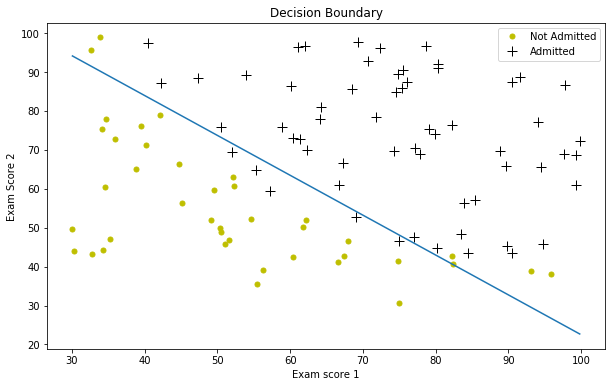

In [13]:
plt.figure(figsize=(10,6))
plt.plot(X[y == 0, 0], X[y == 0, 1], markersize='5', marker='o',linewidth=0, c='y',label='Not Admitted')
plt.plot(X[y == 1, 0], X[y==1,1], markersize='10',marker='+',linewidth=0, c='black',label='Admitted')
boundary_xs = np.array([np.min(X[:-1,0]),np.max(X[:-1,0])])
boundary_ys = (-1/Result[2])*(Result[0] + Result[1]*boundary_xs)
plt.plot(boundary_xs,boundary_ys)
plt.xlabel("Exam score 1")
plt.ylabel("Exam Score 2")
plt.legend(loc='upper right')
plt.title("Decision Boundary")

In [14]:
def predict(X):
    return sigmoidFn(hValue(Result,X))
predict(np.array([1,45,85]))[0]

0.7762915904112411

In [21]:
# Regularized Logistic Regression:
# Now we have data which has scores for two Quality Assurance tests and a column for indicating pass/fail

data_2 = np.loadtxt("ex2data2.txt", delimiter=',',  usecols=(0,1,2), unpack = True)
NX= np.transpose(data_2[:-1])
NX=np.insert(NX,0,1,axis=1)
NY = np.transpose(data_2[-1:])

pos = np.array([NX[i] for i in range(NX.shape[0]) if NY[i] == 1])
neg = np.array([NX[i] for i in range(NX.shape[0]) if NY[i] == 0])
def plotData():
    #plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel("Test 1")
    plt.ylabel("test 2")
    plt.plot(pos[:,1],pos[:,2], '+',c='black',markersize=13,label='Pass')
    plt.plot(neg[:,1],neg[:,2],'o',c='y',markersize=7,label='Fail')
    plt.legend()

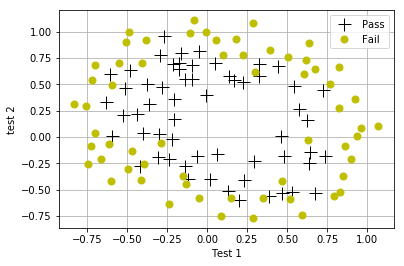

In [22]:
plotData()

In [23]:
def featureMap(X1,X2):
    p=0
    NXX = np.ones((X1.shape[0],28))
    for i in range(7):
        for j in range(7):
            if((i+j)<=6):
                NXX[:,p] = (np.power(X1,i))*(np.power((X2),j))
                p = p + 1
    return NXX
    
NXX = featureMap(NX[:,1],NX[:,2])

In [24]:
def ncf(theta, x, y, l):
    hx = sigmoidFn(hValue(theta,x))
    m = x.shape[0]
    return (1/m)*(np.sum(-(y*np.log(hx) + (np.ones((y.shape[0],1)) - y)*np.log(1-hx))) + (l/2)*np.sum((theta.T).dot(theta)))
initial_tht = np.zeros((28,1))
ncf(initial_tht, NXX, NY,100)

0.6931471805599454

In [25]:
def plotDecisionBoundary(X, y,lambd):
    l = lambd
    result = op.minimize(ncf, initial_tht, args=(NXX, NY, lambd),  method='BFGS', options={"maxiter":500, "disp":False} )
    u = np.linspace(-1,1.5,50)
    v = np.linspace(-1,1.5,50)
    
    z = np.zeros((len(u),len(v)))
    
    for i in range(len(u)):
        for j in range(len(v)):
            z[i][j] = featureMap(np.array([u[i]]),np.array([v[j]])).dot(result.x)
    z = np.transpose(z)
    mycon = plt.contour(u,v,z, [0])
    plt.clabel(mycon, inline=1, fontsize=15)

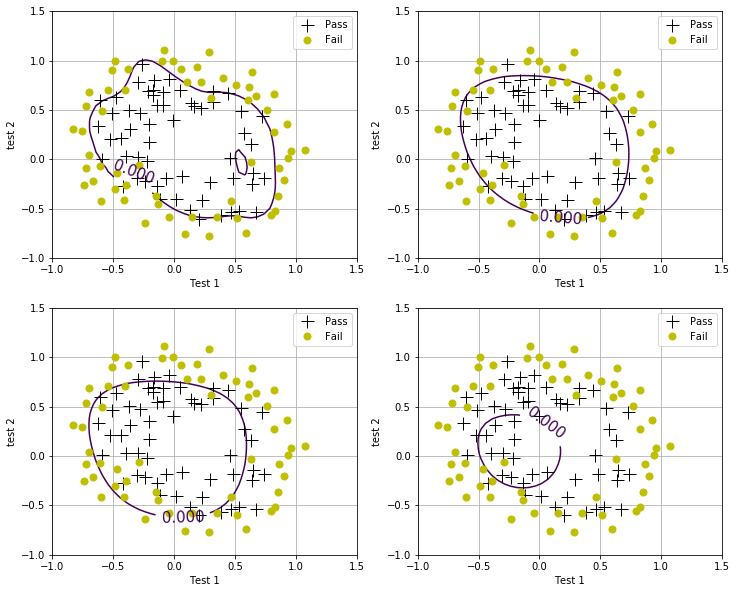

In [26]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotDecisionBoundary(NXX,Y,0)

plt.subplot(222)
plotData()
plotDecisionBoundary(NXX,Y,1)

plt.subplot(223)
plotData()
plotDecisionBoundary(NXX,Y,10)

plt.subplot(224)
plotData()
plotDecisionBoundary(NXX,Y,100)